# Understanding Descriptive Statistics

Import the necessary libraries here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [46]:
# your code here

def dice(n):
    total = []
    for i in range(n):
        i = random.randint(1, 6)
        total.append(i)
    return total
    
teste = dice(10) 
df = pd.DataFrame(teste,columns =['dice'])
df

,dice
0,4
1,6
2,6
3,2
4,2
5,2
6,6
7,5
8,4
9,4


#### 2.- Plot the results sorted by value.

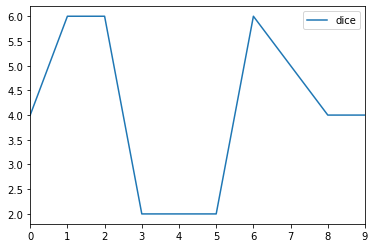

In [49]:
# your code here
df.plot()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1250f97d0>]],
      dtype=object)

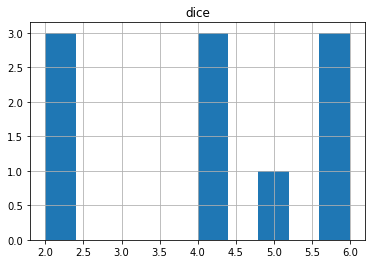

In [50]:
# your code here
df.hist()

In [ ]:
"""
plot 1 gives the dice result per position, plot 2 counts frequency of each number.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
# your code here
#mean x 2, median and quartles

def list_mean(list_):
    return sum(list_)/len(list_)
    
list_mean(df['dice'])
#df['dice'].mean()

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [65]:
# your code here 
#https://stackoverflow.com/questions/40553332/finding-frequency-distribution-of-a-list-of-numbers-in-python

def freq(lst):
    d = {}
    for i in lst:
        if d.get(i):
            d[i] += 1
        else:
            d[i] = 1
    return d

dist = freq(df['dice'])
dist


{4: 3, 6: 3, 2: 3, 5: 1}

In [80]:
_sum = 0
count = 0

for key,value in dist.items():
    _sum += key*value
    count+= value
_mean = _sum/count
_mean


4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [83]:
# your code here
#https://www.geeksforgeeks.org/finding-mean-median-mode-in-python-without-libraries/
#even and odds

n = len(teste) 
teste.sort() 
  
if n % 2 == 0: 
    median1 = teste[n//2] 
    median2 = teste[n//2 - 1] 
    median = (median1 + median2)/2
else: 
    median = teste[n//2] 
    
int(median) 

4

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [85]:
# your code here
#https://stackoverflow.com/questions/45926230/how-to-calculate-1st-and-3rd-quartiles/45926291
samples = teste

def find_median(sorted_list):
    indices = []

    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass

median, median_indices = find_median(samples)
Q1, Q1_indices = find_median(samples[:median_indices[0]])
Q2, Q2_indices = find_median(samples[median_indices[-1] + 1:])

quartiles = [Q1, median, Q2]

print("(Q1, median, Q3): {}".format(quartiles))

(Q1, median, Q3): [2.0, 4.0, 6.0]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

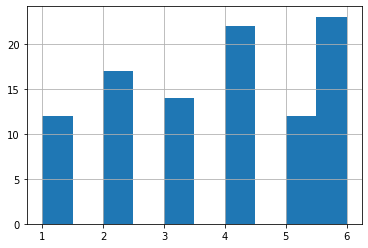

In [99]:
# your code here
df = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv')
df.sort_values(by = ['value'], ascending = False)
df['value'].hist()

In [ ]:
"""
could be a sign that the dice is uneven. Too many even numbers, specially 4 and 6.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [100]:
# your code here

mean_hundred = list_mean(df['value'])
mean_hundred

3.74

#### 3.- Now, calculate the frequency distribution.


In [101]:
# your code here
dist = freq(df['value'])
dist


{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

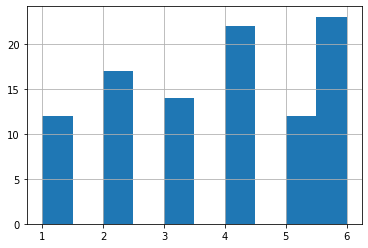

In [102]:
# your code here
df['value'].hist()

In [ ]:
"""
the mean is affected by the awkward frequency of 4 and 6, but not as much as I expected (from 3.5 to 3.74)
Maybe is the low freq of 5s.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

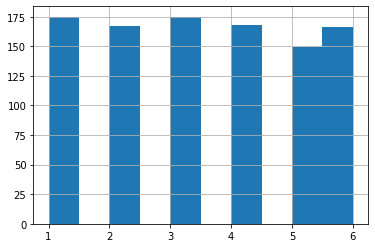

In [105]:
# your code here
ds = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv')
ds.sort_values(by = ['value'], ascending = False)
ds['value'].hist()

In [ ]:
"""
To me this histogram makes more sense, looks well distributed.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [124]:
# your code here

dages = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-understanding-descriptive-stats/data/ages_population.csv')
dages.head(5)


,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126244710>]],
      dtype=object)

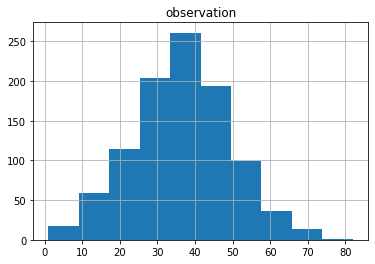

In [122]:
dages.sort_values(by = ['observation'], ascending = True)
dages.hist()

#mean would be between 30 and 40. 
#standard deviation could be aroud 10. 3std deviations would inlcude ages from 10 t0 70.
#maybe standard deviation is a little bit more than 10. 

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [125]:
# your code here
dages.describe()

,observation
count,1000.0000
mean,36.5600
std,12.8165
min,1.0000
25%,28.0000
50%,37.0000
75%,45.0000
max,82.0000


In [ ]:
"""
They do. 
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126322d90>]],
      dtype=object)

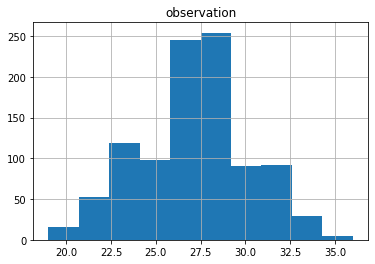

In [129]:
# your code here
dages1 = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-understanding-descriptive-stats/data/ages_population2.csv')
dages1.sort_values(by = ['observation'], ascending = True)
dages1.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
mix() and max() values apparently changed. 
looks like halph of the people are in between 25 and 30 years old.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [130]:
# your code here
dages1.describe()

,observation
count,1000.000000
mean,27.155000
std,2.969814
min,19.000000
25%,25.000000
50%,27.000000
75%,29.000000
max,36.000000


In [ ]:
"""
makes sense, because the datapoints are less spread. 
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x126516110>]],
      dtype=object)

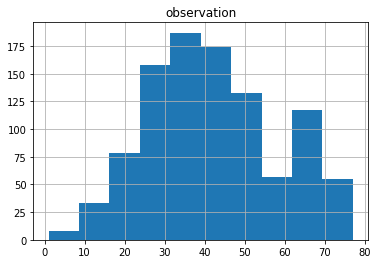

In [133]:
# your code here
dages2 = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-understanding-descriptive-stats/data/ages_population3.csv')
dages2.sort_values(by = ['observation'], ascending = True)
dages2.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [135]:
# your code here
dages2.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
the mean makes sense, but explains 'less' the shape of the histogram. 
Because it's an weird distribution, error is bigger, and this is explained by standard deviation
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [136]:
# your code here
dages2.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
median an mean are pretty close, but mean get's affected by the amount of people between 60 and 70.
quartiles tells us about the concentration of the data around 30 and 50 years.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [137]:
# your code here
np.percentile(dages2, np.arange(0, 100, 10))

array([ 1., 22., 28., 32., 36., 40., 45., 50., 57., 67.])

In [ ]:
"""
the gap between datapoints is bigger below 28 years and above 50 years old.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""